SVM 은 binary classification 만 가능하기 때문에 multi class classification 문제에서는 one versus one 혹은 one versus others 방법을 이용해야 하며, 각 방법마다 학습되는 hyper plane 의 개수가 다릅니다. 이를 확인하기 위하여 scikit-learn 에서 제공하는 작은 크기의 MNIST 데이터에서 5 개의 클래스만 이용하여 각 방법으로 SVC 를 학습해 봅니다.

[0 1 2 3 4]


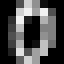

In [1]:
# multi-class classification
import numpy as np
from PIL import Image
from sklearn.datasets import load_digits

X, y = load_digits(n_class=5, return_X_y=True)
print(np.unique(y))

image = Image.fromarray(np.array(16 * X[0].reshape(8,8), dtype=np.uint8))
image = image.resize((64, 64))
image

one versus others 는 #c 개수만큼의 hyper planes 을 학습하기 때문에 decision function 의 값이 (n data, c) 모양입니다. 그리고 각 column 의 순서는 아래의 주석과 같습니다.

In [2]:
from sklearn.svm import SVC

# (o vs others), (1 vs others), ..., (4 vs others)
svc_ovr = SVC(kernel='linear', decision_function_shape='ovr', probability=True)
svc_ovr.fit(X, y)
svc_ovr.decision_function(X).shape

(901, 5)

그러나 one versus one 는 #c (#c - 1) / 2 개수만큼의 hyper planes 을 학습하기 때문에 decision function 의 값의 모양이 다릅니다. 그리고 각 column 의 순서는 아래의 주석과 같습니다.

In [3]:
# (0 vs 1), (0 vs 2), (0 vs 3), (0 vs 4), (1 vs 2), ..., (3 vs 4)
# n_classes * (n_classes) / 2 = 5 * 4 / 2 = 10
svc_ovo = SVC(kernel='linear', decision_function_shape='ovo', probability=True)
svc_ovo.fit(X, y)
svc_ovo.decision_function(X).shape

(901, 10)